## 0. Code Library and Links

In [1]:
import numpy as np 
import pandas as pd 

import scipy
import seaborn

import matplotlib.pylab as plt
from matplotlib import cm

%matplotlib inline

In [2]:
import keras

Using TensorFlow backend.


In [3]:
import tensorflow.examples.tutorials.mnist as mnist

In [4]:
from keras.datasets import cifar10, imdb, boston_housing

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [6]:
from keras.preprocessing import sequence

In [7]:
from keras.utils import to_categorical

In [8]:
from keras.models import Sequential, load_model, Model

In [9]:
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization

In [10]:
from keras.layers.advanced_activations import PReLU

## 1. Backend

In [11]:
'''
/.keras/keras.json
{"image_data_format": "channels_last",
 "epsilon": 1e-07,
 "floatx": "float32",
 "backend": "tensorflow"}
'''
''''''

''

In [12]:
# variants: "theano", "tensorflow", "cntk"
keras.backend.backend()

'tensorflow'

In [13]:
keras.backend.image_dim_ordering()

'tf'

## 2. Data Samples

In [31]:
# 32x32 color images; 50,000 - the train set; 10,000 - the test set; labeled over 10 categories
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

In [32]:
(x_train1.shape, y_train1.shape), (x_test1.shape, y_test1.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

9


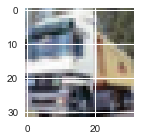

In [33]:
print(y_train1[1][0])
plt.figure(figsize=(2,2))
plt.imshow(x_train1[1]);

In [34]:
# 28x28 grayscale images; 55,000 - the train set; 10,000 - the test set; labeled over 10 categories
mnist_data = mnist.input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [35]:
(x_train2, y_train2), (x_test2, y_test2) = \
(mnist_data.train.images, mnist_data.train.labels), (mnist_data.test.images, mnist_data.test.labels)

In [36]:
(x_train2.shape, y_train2.shape), (x_test2.shape, y_test2.shape)

(((55000, 784), (55000, 10)), ((10000, 784), (10000, 10)))

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


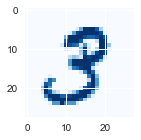

In [37]:
print(y_train2[1])
plt.figure(figsize=(2,2))
plt.imshow(x_train2[1].reshape(28,28), cmap=cm.Blues);

In [38]:
# 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative)
num_words, max_length, embedding_vector_length = 10000, 1000, 32
(x_train3, y_train3), (x_test3, y_test3) = imdb.load_data(path="imdb_full.pkl", num_words=num_words,
                                                          skip_top=0, maxlen=max_length, seed=113,
                                                          start_char=1, oov_char=2, index_from=3)

In [39]:
(x_train3.shape, y_train3.shape), (x_test3.shape, y_test3.shape)

(((25000,), (25000,)), ((24819,), (24819,)))

In [40]:
# 
(x_train4, y_train4), (x_test4, y_test4) =  boston_housing.load_data()

In [41]:
(x_train4.shape, y_train4.shape), (x_test4.shape, y_test4.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

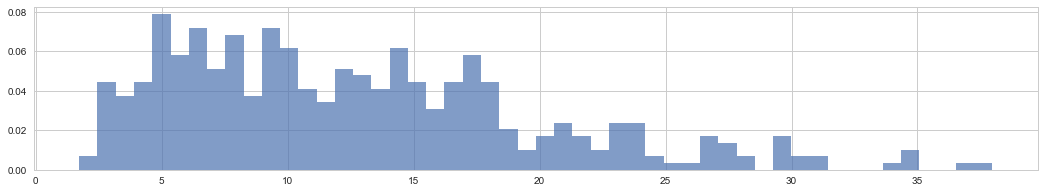

In [42]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18, 3))
plt.hist(y_train4, bins=50, normed=True, alpha=0.7);

In [43]:
# classification; the artificial set; labeled over 2 categories 
X5, Y5 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2)
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 1)

In [44]:
(x_train5.shape, y_train5.shape), (x_test5.shape, y_test5.shape)

(((800, 2), (800,)), ((200, 2), (200,)))

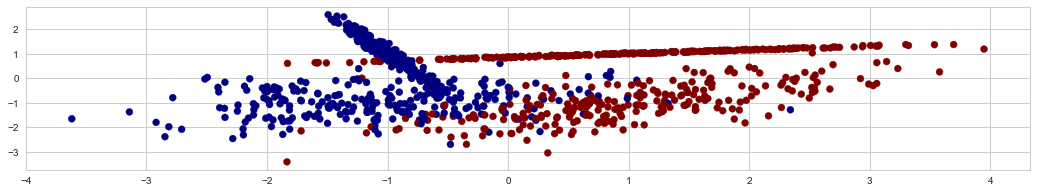

In [45]:
plt.figure(figsize=(18, 3))
plt.scatter(X5[:, 0], X5[:, 1], marker='o', c=Y5, cmap=cm.jet);

## 3. Preprocessing

In [46]:
# Sequence Padding
p_x_train3 = sequence.pad_sequences(x_train3, maxlen=max_length)
p_x_test3 = sequence.pad_sequences(x_test3, maxlen=max_length)

In [47]:
# One-Hot Encoding
c_y_train1 = to_categorical(y_train1, 10)
c_y_test1 = to_categorical(y_test1, 10)

## 4. Models

*Optimizers:*

- 'adam', 'nadam', 
- 'adagrad', 'adadelta', 'adamax',
- 'sgd', 'rmsprop',
- TFOptimizer.

*Loss functions:*

- 'mean_squared_error'('mse'), 'mean_absolute_error'('mae'), 
- 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error',
- 'squared_hinge', 'hinge', 'categorical_hinge',
- 'categorical_crossentropy', 'sparse_categorical_crossentropy',
- 'binary_crossentropy',
- 'kullback_leibler_divergence',
- 'poisson',
- 'cosine_proximity',
- 'logcosh'.

*Metrics:*

- mae, mse, acc,
- binary_accuracy, 
- categorical_accuracy, sparse_categorical_accuracy,
- top_k_categorical_accuracy, sparse_top_k_categorical_accuracy.

----

##### Compilation

*For a multi-class classification problem:*

- model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
- model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

*For a binary classification problem:*

- model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
- model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

*For a mean squared error regression problem:*

- model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
- model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
----

##### Activation
*Types:*

- 'elu', 'selu', 'relu', 'tanh', 'linear', 'softmax', 'softplus', 'softsign', 'sigmoid', 'hard_sigmoid'
- LeakyReLU, PReLU, ELU, ThresholdedReLU

*For a multi-class classification problem:*

- 'softmax'

*For a binary classification problem:*

- 'sigmoid'

*For a mean squared error regression problem:*

- 'linear'

##### Layers

- *Core Layers*
  - `InputLayer` holds the input tensor (for example, the pixel values of the image with width 32, height 32, and 3 color channels).
  - `Dense` (fully connected) layers compute the class scores, resulting in volume of size. For example, the size [11] corresponds to class scores, such as 10 digits and 1 empty place. Each neuron in these layers are connected to all the numbers in the previous volume.
  - `Dropout` layers consist in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting. This leaves the size of the volume unchanged.

- *Convolutional Layers*

- *Recurrent Layers*

- *Pooling Layers*

- *Advanced Activations Layers*

- etc.

In [90]:
# the basic example (binary classification)
basic_model = Sequential([Dense(16, input_dim=2), Activation('relu'), Dense(1), Activation('sigmoid')])
basic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
# train the model
basic_model.fit(x_train5, y_train5, epochs=100, batch_size=8, verbose=0)
# predict classes
y_train5_predictions = basic_model.predict_classes(x_train5)

 32/800 [>.............................] - ETA: 3s

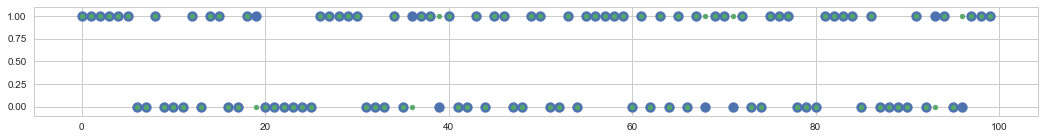

In [92]:
plt.figure(figsize=(18,2))
plt.scatter(range(100), y_train5[:100], s=100)
plt.scatter(range(100), y_train5_predictions[:100], s=25)

In [93]:
# model performance
basic_score = basic_model.evaluate(x_test5, y_test5, batch_size=200)
basic_score

200/200 [==============================] - 0s


[0.24364723265171051, 0.91500002145767212]

In [100]:
basic_model.input

<tf.Tensor 'dense_8_input:0' shape=(?, 2) dtype=float32>

In [94]:
# model parameters
basic_model.output_shape

(None, 1)

In [95]:
basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [37]:
basic_model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 16,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_1', 'trainable': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'c

In [38]:
basic_model.get_weights() 

[array([[  1.14978336e-01,   7.39151657e-01,   8.99032652e-01,
          -4.09542531e-01,   2.94106930e-01,  -6.02361798e-01,
          -9.98931348e-01,   2.70938009e-01,   1.05026588e-01,
          -1.16227198e+00,   7.75431618e-02,   1.34546685e+00,
          -1.03746915e+00,   3.16040725e-01,   2.81929284e-01,
           2.78562188e-01],
        [  1.34679750e-02,   2.77109087e-01,  -2.04192415e-01,
          -7.06686005e-02,  -8.58266652e-01,  -1.86535895e-01,
          -1.45975918e-01,  -7.88411856e-01,  -6.93671405e-01,
          -1.35490566e-01,  -2.59572752e-02,   8.38673472e-01,
          -7.96192850e-04,  -7.27614462e-01,  -8.60509276e-01,
          -5.84445179e-01]], dtype=float32),
 array([-0.31007668,  0.46153256,  0.25092241,  0.0848698 , -0.55428195,
        -0.41392341,  0.12107806, -0.50938773,  0.58691829,  0.17274301,
        -0.23441315,  0.43898273,  0.13511349, -0.45502594, -0.55872577,
        -0.34929979], dtype=float32),
 array([[-0.07738546],
        [ 1.12894

In [39]:
# optimization

opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-5)
opt2 = keras.optimizers.SGD(lr=0.001, decay=1e-5, momentum=0.9, nesterov=True)

basic_model2 = Sequential([Dense(16, input_dim=2), Activation('relu'), Dense(1), Activation('sigmoid')])
basic_model2.compile(optimizer=opt2, loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
basic_model2.fit(x_train5, y_train5, batch_size=8, epochs=100, verbose=0) 

basic_score2 = basic_model2.evaluate(x_test5, y_test5, batch_size=200)
basic_score2

200/200 [==============================] - 0s


[0.26740479469299316, 0.90499997138977051]

In [41]:
# advanced activation

# encoder
inp = Input(shape=(2,))
act = PReLU(alpha_initializer='zeros')
lay = Dense(16, kernel_initializer='uniform', name='encoder')(inp)
lay = act(lay)

# decoder
out = Dense(1, kernel_initializer='uniform', activation='sigmoid', name='decoder')(lay)

# model
basic_model3 = Model(inputs=inp, outputs=out, name='cae')
basic_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
basic_model3.fit(x_train5, y_train5, epochs=100, batch_size=8, verbose=0)
basic_model3.evaluate(x_test5, y_test5, batch_size=200)

200/200 [==============================] - 0s


[0.25488775968551636, 0.9100000262260437]

In [43]:
# save/reload models
basic_model.save('basic_model_file.h5')
my_basic_model = load_model('basic_model_file.h5')

## 5. Neural Networks
### 5.1 Multi-layer Perceptron

In [44]:
# MLP: Binary Classification
def mlp_bc_model():
    model = Sequential()
    
    model.add(Dense(8, input_dim=2, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(16,kernel_initializer='uniform',activation='relu'))
    
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [45]:
mlp_bc_model = mlp_bc_model()
mlp_bc_model.fit(x_train5, y_train5, epochs=10, batch_size=8, verbose=0)
y_train5_mlp_predictions = mlp_bc_model.predict_classes(x_train5)
y_test5_mlp_predictions = mlp_bc_model.predict_classes(x_test5)

 32/200 [===>..........................] - ETA: 0s

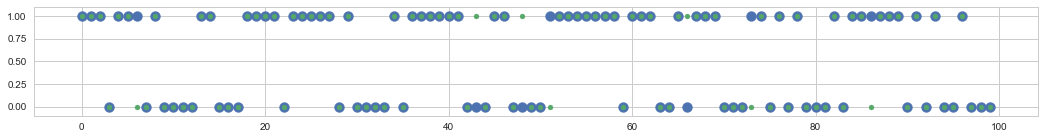

In [46]:
plt.figure(figsize=(18,2))
plt.scatter(range(100), y_test5[:100], s=100)
plt.scatter(range(100), y_test5_mlp_predictions[:100], s=25)

In [47]:
mlp_bc_test_score = mlp_bc_model.evaluate(x_test5, y_test5)
mlp_bc_test_score

 32/200 [===>..........................] - ETA: 0s

[0.27518221259117126, 0.90500000000000003]

In [15]:
# MLP: Multi-Class Classification
def mlp_mc_model():
    model = Sequential()
    
    model.add(Dense(196,activation='relu',input_shape=(784,)))
    model.add(Dropout(0.2))
    
    model.add(Dense(784,activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10,activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
mlp_mc_model = mlp_mc_model()
mlp_mc_model.fit(x_train2, y_train2, epochs=10, batch_size=8, verbose=0)
y_train2_mlp_predictions = mlp_mc_model.predict_classes(x_train2)
y_test2_mlp_predictions = mlp_mc_model.predict_classes(x_test2)

In [ ]:
plt.figure(figsize=(18,2))
plt.scatter(range(100), y_test5[:100], s=100)
plt.scatter(range(100), y_test5_mlp_predictions[:100], s=25)

### 5.2 Convolutional Neural Network (CNN)

### 5.3 Recurrent Neural Network (RNN)